In [2]:
import pandas as pd


In [2]:
import pandas as pd
import glob

# Path where your CSVs are located
path = r"E:\Streamlit\Project2\Data"

# Fetch all CSV files from folder
csv_files = glob.glob(path + "/*.csv")
print("Found files:", csv_files)

# Combine files
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Show final output
print("Combined DataFrame shape:", df.shape)
print(df.head())

Found files: ['E:\\Streamlit\\Project2\\Data\\amazon_india_2015.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2016.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2017.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2018.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2019.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2020.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2021.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2022.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2023.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2024.csv', 'E:\\Streamlit\\Project2\\Data\\amazon_india_2025.csv']
Combined DataFrame shape: (1127609, 34)
      transaction_id  order_date         customer_id   product_id  \
0  TXN_2015_00000001  2015-01-25  CUST_2015_00003884  PROD_000021   
1  TXN_2015_00000002  2015-01-05  CUST_2015_00011709  PROD_000055   
2  TXN_2015_00000003  2015-01-24  CUST_2015_00004782  PROD_000039   
3  TXN_2015_00000004  2015-01-28  CUST_2015_00008105  

In [3]:
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=False, errors='coerce')
df['order_date'] = df['order_date'].dt.strftime('%d-%m-%Y')
df


,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,...,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2015_00000001,25-01-2015,CUST_2015_00003884,PROD_000021,Samsung Galaxy S6 16GB Black,Electronics,Smartphones,Samsung,123614.29,27.91,...,True,Republic Day Sale,5.0,Delivered,1,2015,1,0.19,True,4.7
1,TXN_2015_00000002,05-01-2015,CUST_2015_00011709,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,False,NaN,4.5,Delivered,1,2015,1,0.20,True,4.1
2,TXN_2015_00000003,24-01-2015,CUST_2015_00004782,PROD_000039,Samsung Galaxy Note 5 64GB Black,Electronics,Smartphones,Samsung,97644.25,46.93,...,True,Republic Day Sale,NaN,Delivered,1,2015,1,0.17,True,3.3
3,TXN_2015_00000004,28-01-2015,CUST_2015_00008105,PROD_000085,Motorola Moto G (3rd Gen) 16GB Black,Electronics,Smartphones,Motorola,"21,947.26",0.00,...,False,NaN,3.0,Delivered,1,2015,1,0.22,True,3.5
4,TXN_2015_00000005,31-01-2015,CUST_2015_00002955,PROD_000055,OnePlus OnePlus 2 16GB White,Electronics,Smartphones,OnePlus,54731.86,0.00,...,FALSE,NaN,4.0,Delivered,1,2015,1,0.20,True,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127604,TXN_2025_00019019_DUP,07-04-2025,CUST_2022_00004500,PROD_000136,Samsung Galaxy S7 Edge 16GB Blue,Electronics,Smartphones,Samsung,67658.04,0.00,...,False,NaN,3.5,Delivered,4,2025,2,0.16,True,3.4
1127605,TXN_2025_00053859_DUP,10-09-2025,CUST_2025_00013666,PROD_000527,Samsung Galaxy A50 64GB White,Electronics,Smartphones,Samsung,19905.88,24.29,...,False,NaN,3.5 stars,Delivered,10,2025,4,0.20,False,4.2
1127606,TXN_2025_00030006_DUP,29-06-2025,CUST_2025_00011941,PROD_000839,Samsung Galaxy Note 21 256GB White,Electronics,Smartphones,Samsung,75655.18,30.26,...,True,Back to School,4.0,Delivered,6,2025,2,0.22,True,4.1
1127607,TXN_2025_00066716_DUP,21-11-2025,CUST_2025_00000199,PROD_001581,ASUS Gaming 4GB RAM Black,Electronics,Laptops,ASUS,125461.24,0.00,...,False,NaN,4.5,Delivered,11,2025,4,2.57,False,3.0


In [4]:
df['customer_rating'] = (
    df['customer_rating']
    .astype(str)                        # 🔥 convert everything to string first
    .str.replace("NA", "0")             # replace NA text
    .str.extract(r'(\d+\.?\d*)')        # extract number (int/float)
    .fillna("0")                        # handle blanks
    .astype(float)                      # convert to float
    .astype(int)                        # convert to int
)

In [5]:
df['product_rating'] = (
    df['product_rating']
    .astype(str)                        # 🔥 convert everything to string first
    .str.replace("NA", "0")             # replace NA text
    .str.extract(r'(\d+\.?\d*)')        # extract number (int/float)
    .fillna("0")                        # handle blanks
    .astype(float)                      # convert to float
    .astype(int)                        # convert to int
)

In [6]:
df['delivery_days']=df['delivery_days'].replace('-1','1').replace('1-2 days','2').replace('Same Day','1').replace('Express','1').astype(int)

In [7]:
df['category'] = df['category'].astype(str).str.lower()
df['category']=df['category'].replace("electronics & accessories","electronics").replace("electronic","electronics").replace("electronicss","electronics")
df['category'] = df['category'].replace({
    'electronics': 1,
    'fashion': 2,
    'grocery': 3,
    'home': 4
}).astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_1288\2038782349.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['category'] = df['category'].replace({


In [8]:
df['is_prime_eligible'] = (
    df['is_prime_eligible']
        .astype(str)      # convert everything to string
        .str.lower()      # normalize case
        .str.strip()      # remove spaces
        .replace({
            'true': 1,
            'yes': 1,
            '1': 1,
            'false': 0,
            'no': 0,
            '0': 0,
            'nan': 0,
            'none': 0
        })
        .astype(int)      # final conversion to int
)

C:\Users\HP\AppData\Local\Temp\ipykernel_1288\635252410.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


In [9]:
df['is_festival_sale'] = (
    df['is_festival_sale']
        .astype(str)      # convert everything to string
        .str.lower()      # normalize case
        .str.strip()      # remove spaces
        .replace({
            'true': 1,
            'yes': 1,
            '1': 1,
            'false': 0,
            'no': 0,
            '0': 0,
            'nan': 0,
            'none': 0
        })
        .astype(int)      # final conversion to int
)

C:\Users\HP\AppData\Local\Temp\ipykernel_1288\3872567983.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


In [10]:
df['is_prime_member'] = (
    df['is_prime_member']
        .astype(str)      # convert everything to string
        .str.lower()      # normalize case
        .str.strip()      # remove spaces
        .replace({
            'true': 1,
            'yes': 1,
            '1': 1,
            'false': 0,
            'no': 0,
            '0': 0,
            'nan': 0,
            'none': 0
        })
        .astype(int)      # final conversion to int
)

C:\Users\HP\AppData\Local\Temp\ipykernel_1288\3956888722.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


In [11]:
df['original_price_inr'] = (
    df['original_price_inr']
        .astype(str)
        .str.replace('â‚¹', '', regex=False)
        .str.replace('-', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.replace('Rs', '', regex=False)
        .str.replace("'", '', regex=False)
        .str.replace("₹",'',regex=False)
        .str.strip()
        .astype(float)
)

In [12]:
df['payment_method']=(
    df['payment_method']
    .replace("Wallet","UPI")
    .replace("BNPL","UPI")
    .replace("UPI","UPI")
    .replace("Credit Card", "Credit Card")
    .replace("Net Banking", "Net BAnking")
    .replace("Debit Card", "Debit Card")
    .replace("COD","COD")
    .astype(str)
)

In [14]:
df['payment_method']

0                 COD
1                 COD
2                 COD
3                 COD
4                 COD
              ...    
1127604           UPI
1127605    Debit Card
1127606           UPI
1127607           UPI
1127608           UPI
Name: payment_method, Length: 1127609, dtype: object

In [13]:
df['customer_city']=(
    df['customer_city']
    .astype(str)
    .str.replace("mumba","Mumbai", regex=False)
    .str.replace("Delhi NCR","New Delhi", regex=False)
    .str.replace("Delhi","New Delhi", regex=False)
    .str.replace("Coimbatore","Chennai", regex=False)
    .str.replace("chenai","Chennai", regex=False)
    .str.replace("Bombay","Mumbai", regex=False)
    .str.replace("Bangaluru","Bangalore", regex=False)
    .str.replace("Banglore","Bangalore", regex=False)
    .str.replace("Bengalore","Bangalore", regex=False)
    .str.replace("Bengaluru","Bangalore", regex=False)
    .str.replace("Calcutta","Kolkatta", regex=False)
    .str.replace("Madras","Chennai", regex=False)
    .str.replace("Banglor","Bangalore", regex=False)
    
    

)

In [14]:
df.to_csv(r"E:\Streamlit\Project2\Data_cleaned.csv", index=False)

In [17]:
df['category']=df['category'].replace("NaN",5)

In [18]:
df.dtypes

transaction_id             object
order_date                 object
customer_id                object
product_id                 object
product_name               object
category                    int64
subcategory                object
brand                      object
original_price_inr        float64
discount_percent          float64
discounted_price_inr      float64
quantity                    int64
subtotal_inr              float64
delivery_charges          float64
final_amount_inr          float64
customer_city              object
customer_state             object
customer_tier              object
customer_spending_tier     object
customer_age_group         object
payment_method             object
delivery_days               int64
delivery_type              object
is_prime_member             int64
is_festival_sale            int64
festival_name              object
customer_rating             int64
return_status              object
order_month                 int64
order_year    

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


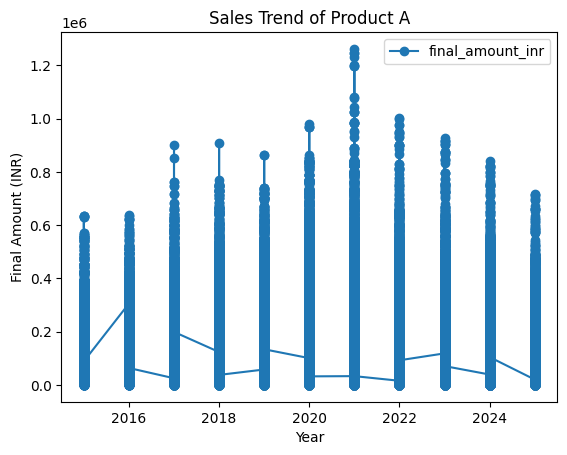

In [48]:
#Question1
plt.plot(
    df['order_year'], 
    df['final_amount_inr'], 
    marker='o', 
    label='final_amount_inr'
)

plt.xlabel('Year')
plt.ylabel('Final Amount (INR)')
plt.title('Sales Trend of Product A')
plt.legend()
plt.show()


In [55]:
#question 2 
data=df[['order_year','order_month','is_festival_sale','category']].corr()

In [56]:
data

,order_year,order_month,is_festival_sale,category
order_year,1.000000,-0.016054,-0.008976,NaN
order_month,-0.016054,1.000000,-0.037332,NaN
is_festival_sale,-0.008976,-0.037332,1.000000,NaN
category,NaN,NaN,NaN,NaN


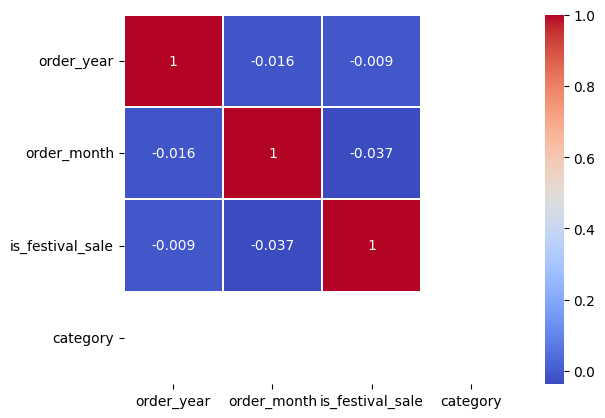

In [57]:

from sklearn.preprocessing import LabelEncoder


sns.heatmap(data, annot=True, linewidths=0.01, cmap = "coolwarm")
plt.show()

In [86]:
df['payment_method'] = (
    df['payment_method']
        .astype(int)
        .replace({
            1: "UPI",
            2: "Credit Card",
            3: "Net Banking",
            4: "Debit Card",
            5: "COD"
        })
        .astype(str)
)



In [87]:
df['payment_method'].unique()

array(['COD', 'Debit Card', 'Credit Card', 'Net Banking', 'UPI'],
      dtype=object)

In [88]:
df['payment_method'].value_counts()

payment_method
UPI            427344
COD            322831
Credit Card    172261
Debit Card     140202
Net Banking     64971
Name: count, dtype: int64

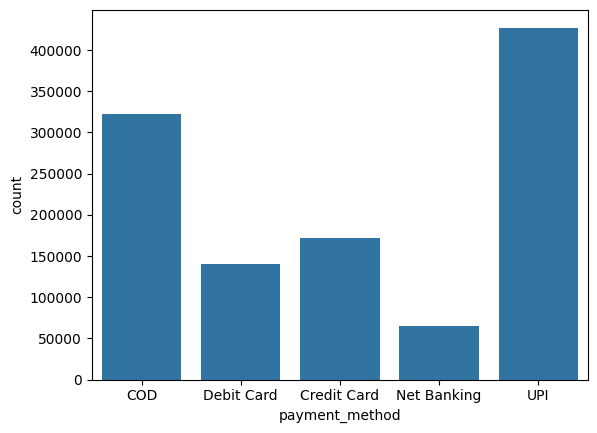

In [89]:
sns.countplot(df, x='payment_method')
plt.show()

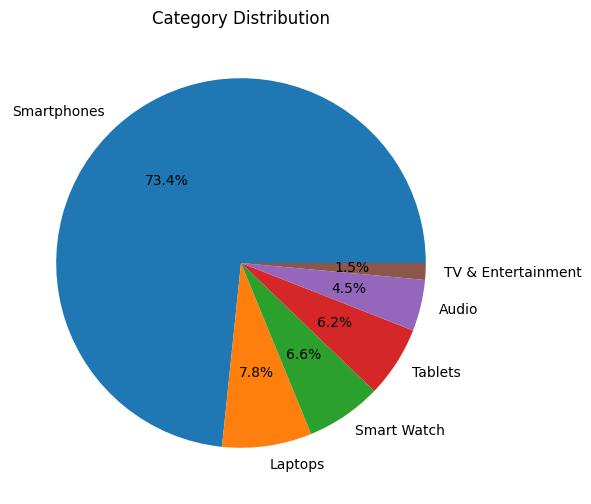

In [100]:
#question 5
cat_counts = df['subcategory'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(cat_counts.values, labels=cat_counts.index ,autopct='%1.1f%%')
plt.title("Category Distribution")
plt.show()

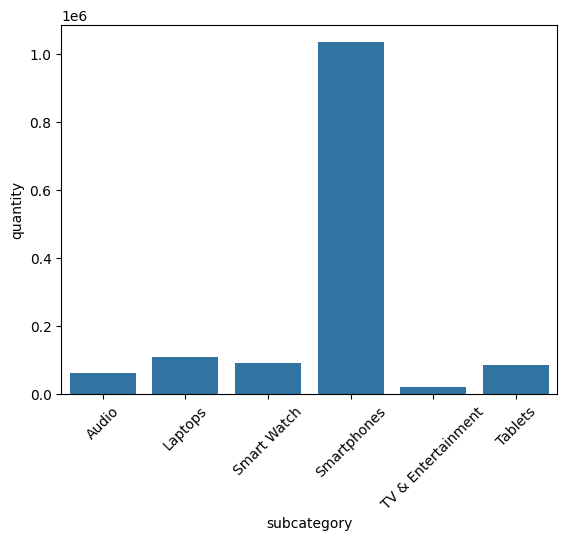

In [111]:
subcat_qty = df.groupby('subcategory')['quantity'].sum().reset_index()

sns.barplot(data=subcat_qty, x='subcategory', y='quantity')
plt.xticks(rotation=45)
plt.show()

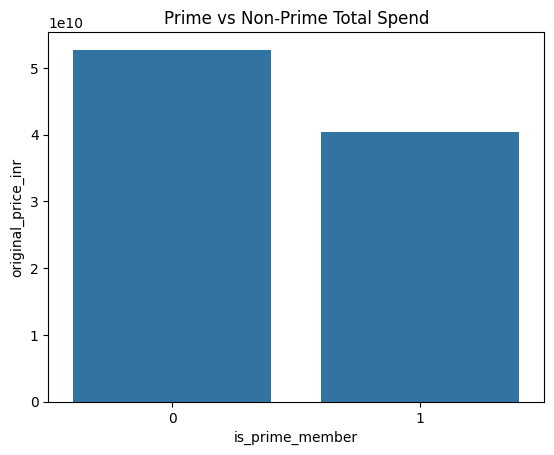

In [17]:
#questiong 6
df['original_price_inr'] = df['original_price_inr'].astype(float)
df['is_prime_member'] = df['is_prime_member'].astype(int)

# Group only numeric columns
cust_behv = df.groupby('is_prime_member')['original_price_inr'].sum().reset_index()

# Plot bar chart
sns.barplot(data=cust_behv, x='is_prime_member', y='original_price_inr')
plt.title("Prime vs Non-Prime Total Spend")
plt.show()

In [18]:
#question 7
df['customer_tier'].value_counts().index

Index(['Metro', 'Tier1', 'Tier2', 'Rural'], dtype='object', name='customer_tier')

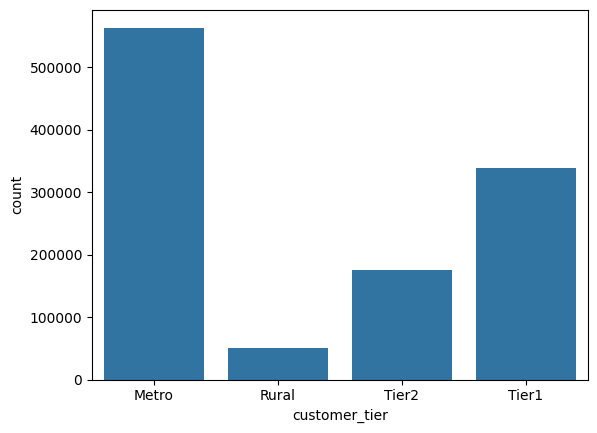

In [20]:
sns.countplot(data=df,x='customer_tier')
plt.show()

In [23]:
df['is_festival_sale'].value_counts()

is_festival_sale
0    777736
1    349873
Name: count, dtype: int64

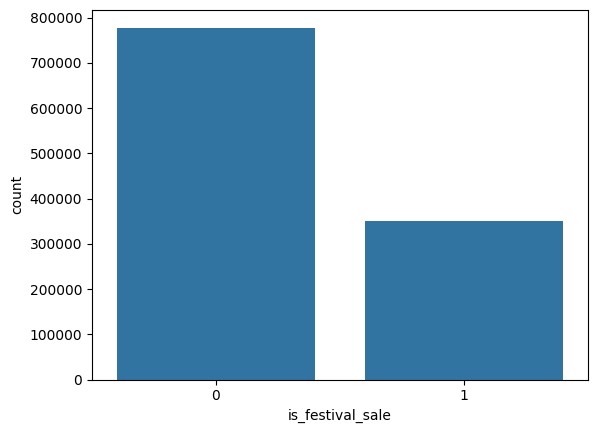

In [ ]:
#question 8
df['is_festival_sale'].value_counts()
sns.countplot(data=df,x='is_festival_sale')
plt.show()

In [25]:
df.dtypes

transaction_id             object
order_date                 object
customer_id                object
product_id                 object
product_name               object
category                    int64
subcategory                object
brand                      object
original_price_inr        float64
discount_percent          float64
discounted_price_inr      float64
quantity                    int64
subtotal_inr              float64
delivery_charges          float64
final_amount_inr          float64
customer_city              object
customer_state             object
customer_tier              object
customer_spending_tier     object
customer_age_group         object
payment_method             object
delivery_days               int64
delivery_type              object
is_prime_member             int64
is_festival_sale            int64
festival_name              object
customer_rating             int64
return_status              object
order_month                 int64
order_year    

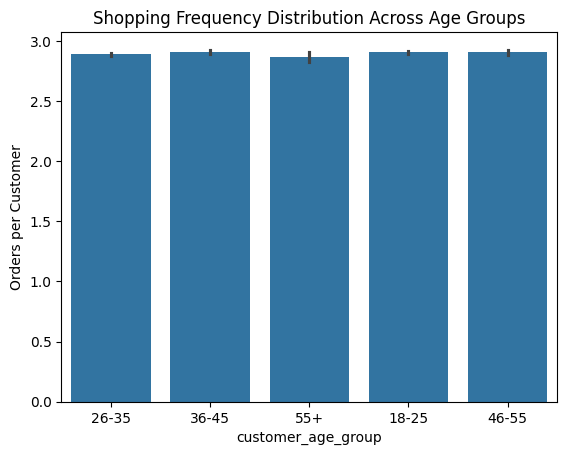

In [39]:
#question 9
shopping_freq = df.groupby(['customer_id', 'customer_age_group'])['product_id'].count().reset_index()
shopping_freq.rename(columns={'product_id':'order_count'}, inplace=True)

sns.barplot(data=shopping_freq, x='customer_age_group', y='order_count')
plt.title("Shopping Frequency Distribution Across Age Groups")
plt.ylabel("Orders per Customer")
plt.show()


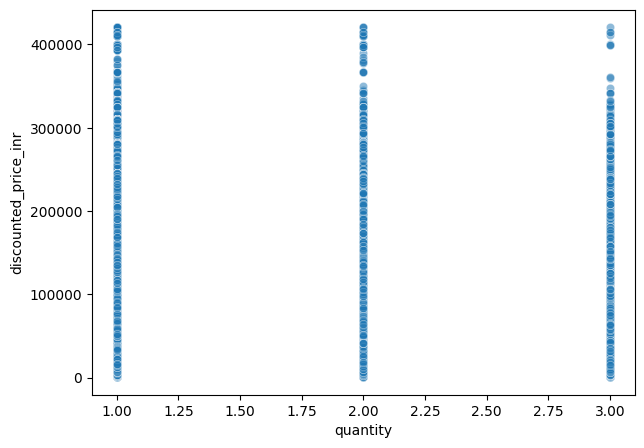

In [52]:
#question 10
plt.figure(figsize=(7,5))
df[['discounted_price_inr','quantity']]
sns.scatterplot(data=df,x='quantity',y='discounted_price_inr',alpha=0.5)
#plt.xlabel('Selling Price')
#plt.ylabel('Quantity')
plt.show()

In [53]:
cc=df[['discounted_price_inr','quantity']].corr()
cc

,discounted_price_inr,quantity
discounted_price_inr,1.000000,0.000297
quantity,0.000297,1.000000


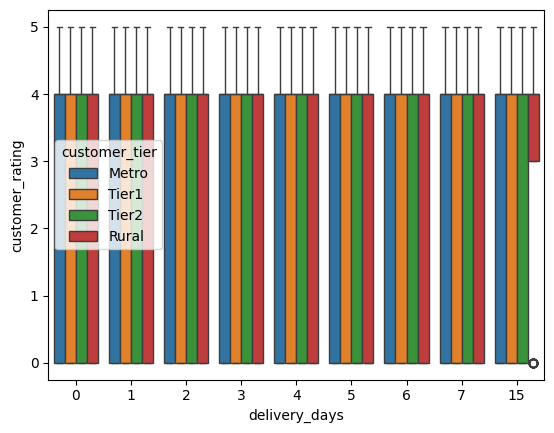

In [54]:
#question 11
df[['delivery_days','customer_rating','customer_tier']]
sns.boxplot(data=df,x='delivery_days',y='customer_rating',hue='customer_tier')
plt.show()

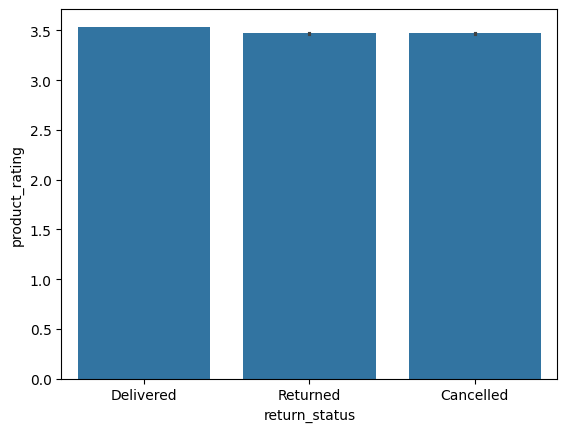

In [18]:
sns.barplot(df,x='return_status', y='product_rating')
plt.show()

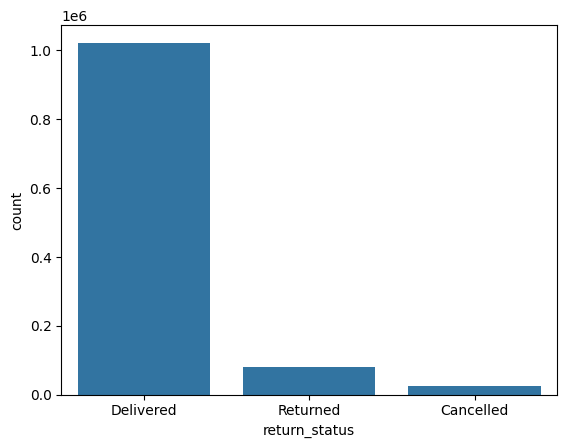

In [24]:
sns.countplot(data=df,x='return_status')
plt.show()

e:\Streamlit\project1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


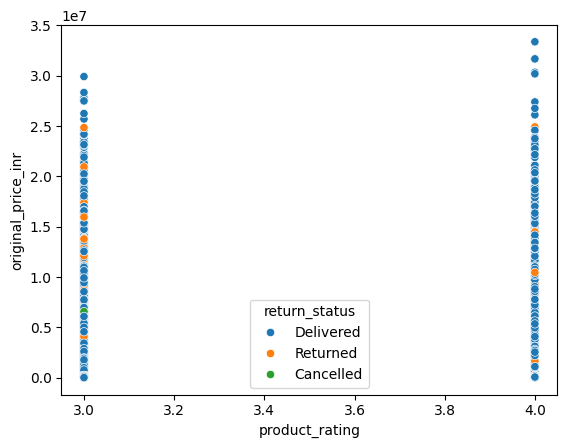

In [15]:
sns.scatterplot(data=df,x='product_rating',y='original_price_inr',hue='return_status')
plt.show()

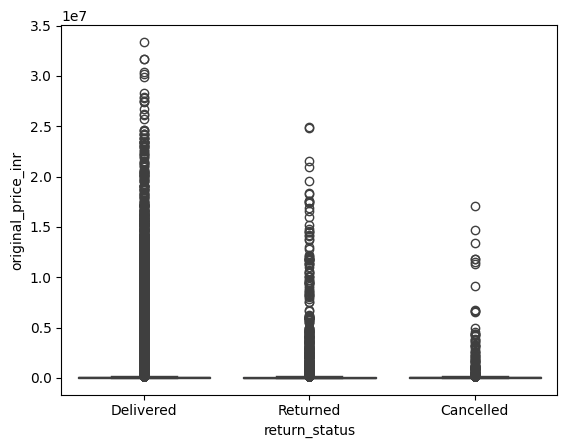

In [24]:
sns.boxplot(data=df,x='return_status',y='original_price_inr')
plt.show()

In [32]:

df['return_status']=df['return_status'].astype(str).replace("Delivered",1).replace("Cancelled",2).replace("Returned",3).astype(int)




In [33]:
cc=df[['product_rating','original_price_inr','return_status']].corr()
cc

,product_rating,original_price_inr,return_status
product_rating,1.000000,0.003447,-0.036962
original_price_inr,0.003447,1.000000,-0.003913
return_status,-0.036962,-0.003913,1.000000


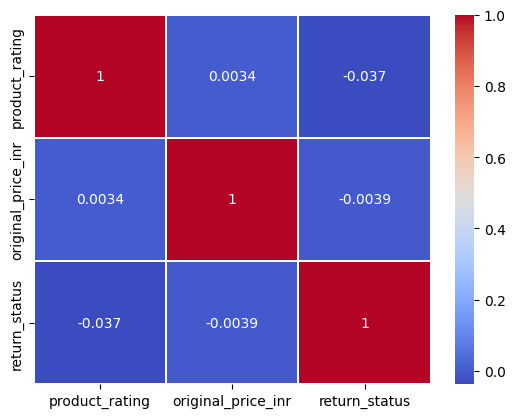

In [34]:
sns.heatmap(cc,annot=True,linewidth=0.1,cmap='coolwarm')
plt.show()

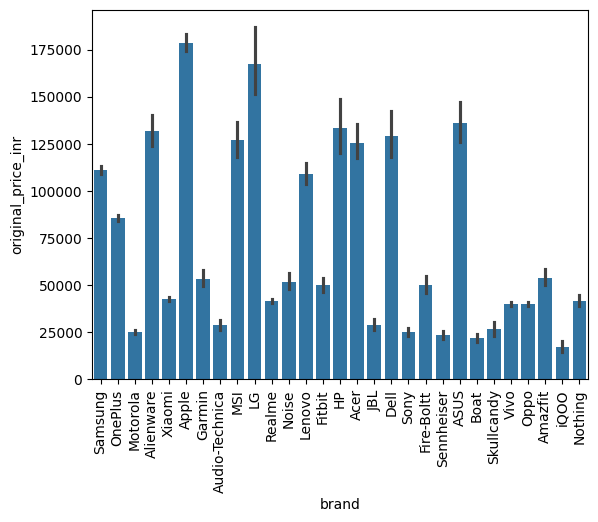

In [41]:
#question 13

sns.barplot(data=df, x='brand', y='original_price_inr')
#plt.xlabel("Brand")                    
#plt.ylabel("Original Price (INR)")     
plt.xticks(rotation=90)                
plt.show()

In [ ]:
df['original_price_inr'] = (
    df['original_price_inr']
        .astype(str)
        .str.replace('â‚¹', '', regex=False)
        .str.replace('-', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.replace('Rs', '', regex=False)
        .str.replace("'", '', regex=False)
        .str.replace("₹",'',regex=False)
        .str.strip()
        .astype('float')
)

In [ ]:
df['original_price_inr'].valur_

0          123614.29
1           54731.86
2           97644.25
3           21947.26
4           54731.86
             ...    
1127604     67658.04
1127605     19905.88
1127606     75655.18
1127607    125461.24
1127608     15852.16
Name: original_price_inr, Length: 1127609, dtype: float64

In [ ]:
plt.pie(df['original_price_inr'],
        labels=df['brand'],
        autopct='%1.1f%%',
        startangle=90)
plt.show()